# Predicting House Prices of Buenos Aires City

## Dataset
Each record of this dataset corresponds to a property for sale.

### Features
A description of the features can be found below:

|Feature|Description|
|:------|:----------|
|id|id de la propiedad|
|created_on|Date of publishment on website|
|operation|Rent, sell|
|property_type|House, Apartament, PentHouse, etc|
|place_with_parent_names|Name of the property location|
|lat-lon|Concatenated coordinates|
|lat|latitude|
|lon|longitude|
|price|Price|
|currency|Currency used by publisher|
|price_aprox_usd|Aprox price in USD|
|surface_total_in_m2|Total surface*|
|surface_covered_in_m2|Covered surface*|
|price_usd_per_m2|Price per unit area\*\*|
|floor|Number of floors|
|rooms|Number of rooms|
|expenses|Expenses|
|properati_url|Property URL on Properati website|
|barrio|Neighborhood|
|comuna|Number of the sector in which property is located|

<center><i>*squared meters<br>
** USD per squared meter</i></center>

## Libraries & Modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
pd.set_option('precision', 1)
pd.set_option('max_columns', 120)
pd.set_option('max_colwidth', 5000)
pd.set_option('display.max_rows', 100)

sns.set_context("paper")
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10,5)

## Dataset Loading

In [2]:
df = pd.read_csv("dataset/data_properati.csv", parse_dates = ['created_on'])
df.head()

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,barrio,comuna
0,2017-09-22,sell,house,|Argentina|Capital Federal|Palermo|Palermo Viejo|,"-34.5889531469,-58.4298817776",-34.6,-58.4,2.0e+06,312.0,NaN,6410.3,NaN,NaN,NaN,https://www.properati.com.ar/2os_venta_casa_palermo-viejo_rent-ba,PALERMO,14.0
1,2017-08-01,sell,store,|Argentina|Capital Federal|Palermo|,"-34.586069,-58.414431",-34.6,-58.4,7.9e+05,121.0,121.0,6528.9,NaN,NaN,NaN,https://www.properati.com.ar/1cl7l_venta_local_palermo_santa-fe-av-al-3500_sotano_garage_subte-linea-d_deptos-temporarios,PALERMO,14.0
2,2017-08-02,sell,store,|Argentina|Capital Federal|Palermo|Palermo Soho|,"-34.589723,-58.4325664",-34.6,-58.4,3.4e+05,122.0,108.0,2811.5,NaN,2.0,NaN,https://www.properati.com.ar/1cm8w_venta_local_palermo-soho_cabrera-jose-a-_5000_jardin_lavadero_patio_piscina_toilette_garage_ojo-propiedades,PALERMO,14.0
3,2017-08-03,sell,store,|Argentina|Capital Federal|Palermo|,"-34.5923646,-58.4144028",-34.6,-58.4,1.4e+05,24.0,24.0,6041.7,NaN,NaN,NaN,https://www.properati.com.ar/1covk_venta_local_palermo_paraguay-al-3500_subte-linea-d_brick-propiedades-local-alto-palermo,PALERMO,14.0
4,2017-08-08,sell,store,|Argentina|Capital Federal|Barrio Norte|,"-34.585652875,-58.4114933233",-34.6,-58.4,1.8e+05,24.0,24.0,7291.7,NaN,NaN,NaN,https://www.properati.com.ar/1csk7_venta_local_barrio-norte_subte-linea-d_aranalfe_e1j,PALERMO,14.0


# Exploratory Data Analysis

## Dataset Metadata

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   created_on               18979 non-null  datetime64[ns]
 1   operation                18979 non-null  object        
 2   property_type            18979 non-null  object        
 3   place_with_parent_names  18979 non-null  object        
 4   lat-lon                  18979 non-null  object        
 5   lat                      18979 non-null  float64       
 6   lon                      18979 non-null  float64       
 7   price_aprox_usd          17445 non-null  float64       
 8   surface_total_in_m2      16586 non-null  float64       
 9   surface_covered_in_m2    16876 non-null  float64       
 10  price_usd_per_m2         16037 non-null  float64       
 11  floor                    2756 non-null   float64       
 12  rooms                    13517 n

## Dataset size

In [4]:
print(f'DataFrame has {df.shape[0]} records and {df.shape[1]} features.')

DataFrame has 18979 records and 17 features.


## Columns in Dataset

In [5]:
df.columns.values

array(['created_on', 'operation', 'property_type',
       'place_with_parent_names', 'lat-lon', 'lat', 'lon',
       'price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2',
       'price_usd_per_m2', 'floor', 'rooms', 'expenses', 'properati_url',
       'barrio', 'comuna'], dtype=object)

The current project is focused on *Family Housing*, then only records of *apartment, house & PH* will be kept.  

In [6]:
mask = ['house','PH','apartment']
df = df[df.property_type.isin(mask)]

## Numeric Values

### Statistical Summary

In [7]:
df.describe()

,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,comuna
count,1.8e+04,1.8e+04,1.7e+04,15691.0,15968.0,15207.0,2720.0,13407.0,3.7e+03,17888.0
mean,-3.5e+01,-5.8e+01,2.9e+05,138.1,119.1,2748.9,11.1,3.0,4.9e+03,8.0
std,2.7e-02,4.1e-02,3.9e+05,1778.5,1540.2,1863.8,53.7,1.7,3.1e+04,5.0
min,-3.5e+01,-5.9e+01,5.0e+03,0.0,1.0,1.0,1.0,1.0,1.0e+00,1.0
25%,-3.5e+01,-5.8e+01,1.2e+05,48.0,43.0,2000.0,2.0,2.0,1.6e+03,3.0
50%,-3.5e+01,-5.8e+01,1.8e+05,74.0,66.0,2555.6,4.0,3.0,2.8e+03,8.0
75%,-3.5e+01,-5.8e+01,3.1e+05,130.0,111.0,3160.9,8.0,4.0,5.1e+03,13.0
max,-3.5e+01,-5.8e+01,1.2e+07,184000.0,150000.0,142450.1,904.0,30.0,1.8e+06,15.0


### House amenities

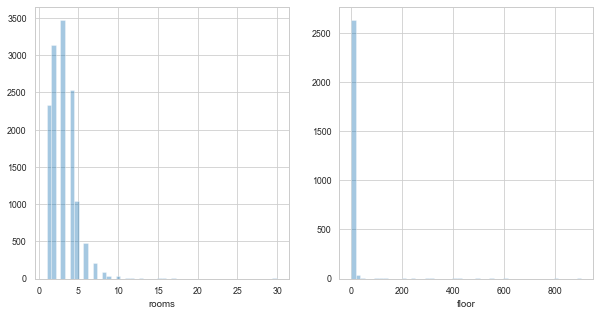

In [8]:
fig, ax = plt.subplots(nrows = 1, ncols = 2)
sns.distplot(df['rooms'], kde= False, ax = ax[0])
sns.distplot(df['floor'], kde= False, ax = ax[1])
plt.show()

Inconsistent values can be found in both variables, both cases will be analyzed further in **Feature Engineering** section.

### Price related variables

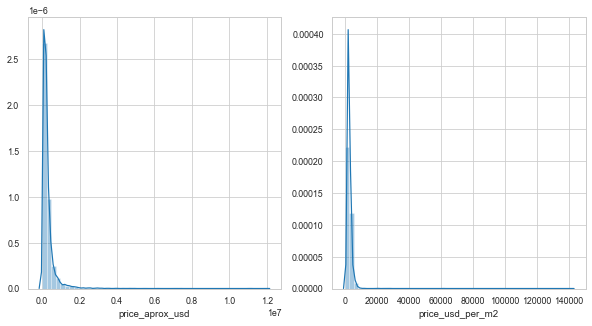

In [9]:
fig, ax = plt.subplots(nrows = 1, ncols = 2)
sns.distplot(df['price_aprox_usd'], ax = ax[0])
sns.distplot(df['price_usd_per_m2'], ax = ax[1])
plt.show()

### Surface related variables

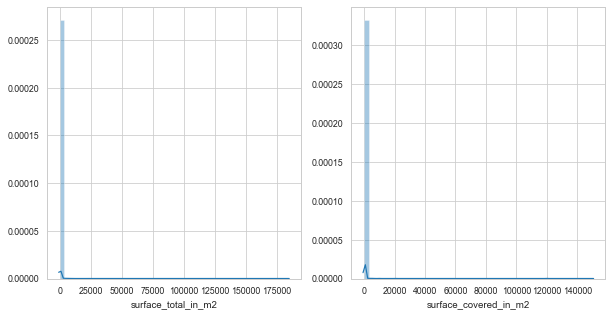

In [10]:
fig, ax = plt.subplots(nrows = 1, ncols = 2)
sns.distplot(df['surface_total_in_m2'], ax = ax[0])
sns.distplot(df['surface_covered_in_m2'], ax = ax[1])
plt.show()

## Categorical Variables

### Propety Type
The number of records and different categories in `property_type` will be checked as follows:

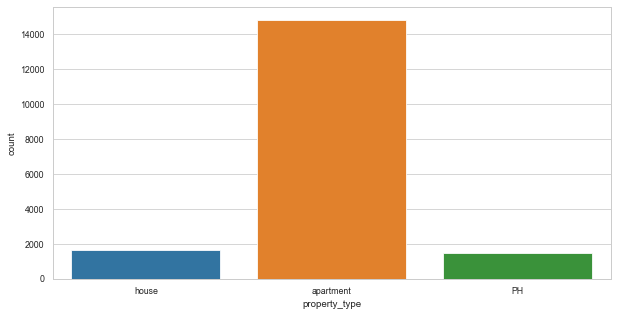

In [11]:
sns.countplot(df['property_type'])
plt.show()

In [12]:
df['property_type'].value_counts().rename_axis("Property Type").to_frame("Count")

,Count
Property Type,
apartment,14807
house,1618
PH,1463


### Operation

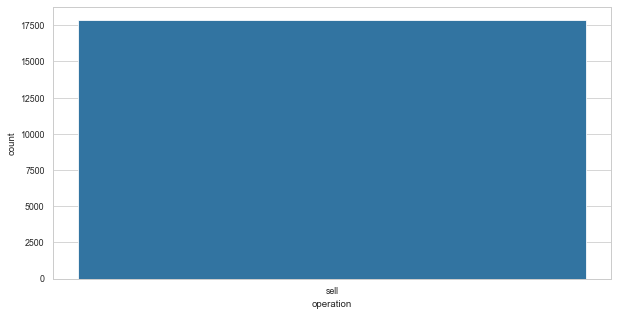

In [13]:
sns.countplot(df['operation'])
plt.show()

## Inconsistent Data

### Missing Values

In [14]:
df.isnull().sum()[df.isnull().sum()>0].rename_axis("Feature", axis=0).to_frame("% Missing Values")/len(df)*100

,% Missing Values
Feature,
price_aprox_usd,7.7
surface_total_in_m2,12.3
surface_covered_in_m2,10.7
price_usd_per_m2,15.0
floor,84.8
rooms,25.1
expenses,79.3


The null values in target variable `price_aprox_usd` will be dropped.

In [15]:
to_drop = ['price_aprox_usd']
df.dropna(subset = to_drop, axis = 0, inplace = True)

The null values in `surface_total_in_m2`,`surface_covered_in_m2`,`rooms`,`price_aprox_usd` & `price_usd_per_m2` will be dropped.

In [16]:
df.isnull().sum()[df.isnull().sum()>0].rename_axis("Feature", axis=0).to_frame("% Missing Values")/len(df)*100

,% Missing Values
Feature,
surface_total_in_m2,7.8
surface_covered_in_m2,6.2
price_usd_per_m2,7.9
floor,84.1
rooms,21.3
expenses,78.1


The missing records in `surface_total_in_m2` can be imputed and the `price_usd_per_m2` calculated as follows:  

$$ price{\_}usd{\_}per{\_}m^2 = \frac{price{\_}aprox{\_}usd}{surface{\_}total{\_}in{\_}m^2}$$

### Duplicates

In [18]:
df[df.duplicated()].count().rename_axis('Feature').to_frame('Count')

,Count
Feature,
created_on,0
operation,0
property_type,0
place_with_parent_names,0
lat-lon,0
lat,0
lon,0
price_aprox_usd,0
surface_total_in_m2,0


No duplicated records were found.

### Incosistent Records
Properties can have a `surface_covered_in_m2` larger than `surface_total_in_m2` due to errors in data entry.

In [19]:
wrong_surface_rows = df[df['surface_total_in_m2'] < df['surface_covered_in_m2']]
print(f"There are {len(wrong_surface_rows)} incosistent area records.")

There are 109 incosistent area records.


These records will not be deleted but their values will be swapped.

In [20]:
df.at[wrong_surface_rows.index, 'surface_total_in_m2'] = wrong_surface_rows.surface_covered_in_m2
df.at[wrong_surface_rows.index, 'surface_covered_in_m2'] = wrong_surface_rows.surface_total_in_m2

The real state company do not have all the real coordinates for each property, then they use a central point of the neighborhood or reference point, e.g. Obelisco. The properties sharing the same location will be checked as follows:

In [21]:
count_coord = df.groupby(['lat', 'lon']).size()
count_coord[count_coord > 1].sort_values(ascending = False).head(10).to_frame('Count')

Count
lat   lon         
-34.6 -58.4    152
      -58.4    121
      -58.5     82
      -58.4     47
      -58.4     44
      -58.4     40
      -58.4     38
      -58.4     35
      -58.4     32
      -58.4     31

The real state company suggested to keep the locations with no more than five properties sharing it.

In [22]:
count_coord.name = 'rep_coord'
df = df.join(count_coord, on=['lat', 'lon'])
df = df[df.rep_coord <= 5]
df.drop('rep_coord', inplace = True, axis = 1)

## Estudiando los barrios

### Barrios con más edificios y barrios con más casas
Al saber qué barrios son los que tienen más cantidad de edificios en venta y cuáles son los que tienen más casas podemos darnos una idea de qué tipo de barrio es. Si es más residencial, con más población, poder adquisitivo, etc. 
Para eso vamos a empezar calculando los porcentajes de cada tipo de propiedad según el barrio.

In [ ]:
total_propiedades = df_filtered.groupby('barrio')['property_type'].count().values

In [ ]:
porcentaje_casas_ph = df_filtered[df_filtered.property_type.isin(['PH', 'house'])].groupby('barrio').count().property_type/total_propiedades
porcentaje_edificios = df_filtered[df_filtered.property_type == 'apartment'].groupby('barrio').count().property_type/total_propiedades

In [ ]:
print("Barrios con mayor porcentaje de edificios: \n", porcentaje_edificios.sort_values()[::-1][:5])
print("Barrios con mayor porcentaje de casas y phs: \n ", porcentaje_casas_ph.sort_values()[::-1][:5])

Para darnos una idea de las diferencias entre los porcentajes de edificios y casas en estos barrios, vamos a graficarlos
en forma de torta.

In [ ]:
barrios_casas = porcentaje_casas_ph.sort_values()[::-1][:5].index
barrios_edificios = porcentaje_edificios.sort_values()[::-1][:5].index
fig, axs = plt.subplots(1,2,figsize=(14,7))
df_filtered[df_filtered.barrio.isin(barrios_edificios)].property_type.value_counts().plot(x=None,y=None, kind='pie', startangle=30, ax=axs[0],autopct='%1.2f%%')
df_filtered[df_filtered.barrio.isin(barrios_casas)].property_type.value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')

### Barrios más caros y más baratos

Veamos primero la distribución del precio por metro cuadrado para todo el dataset. De esta manera, vamos a remover valores que consideremos extremos.

En el siguiente proyecto vamos a volver sobre este tema con más profundidad.

**10)** Tomando el atributo `price_usd_per_m2` **calculá** su **mínimo**, **máximo**, **promedio (mean)**, **mediana (median)** y **desvío estándar (std)**

In [ ]:
# Definamos una función que se pueda reusar
def stats_calc(df_feat):
    stats = {
        "min": round(df_feat.min(),2),
        "max": round(df_feat.max(),2),
        "mean": round(df_feat.mean(),2),
        "median": round(df_feat.median(),2),
        "std": round(df_feat.std(),2)
    }
    return stats
st_1 = stats_calc(df_filtered.price_usd_per_m2)
st_1
#O bien hacer uso del método pd.describe()

También podemos calcular otros estadísticos como los cuartiles. 

**11) Mostrá** el **primer y tercer cuartil** y luego también el **rango intercuartilíco**

In [ ]:
def quart_calc(df_feat):
    quart = { 
        "first_quart": round(df_feat.quantile(0.25),2),
        "third_quart": round(df_feat.quantile(0.75),2)
    }
    quart.update({"interquart_range": round(quart.get("third_quart")-quart.get("first_quart"),2)})
    return quart

quart_calc(df_filtered.price_usd_per_m2)

### Quitando valores extremos
Eliminemos aquellas observaciones cuyo precio por metro cuadrado este fuera de los percentiles 10 y 90. De este modo intentaremos remover valores extremos de una manera sencilla para tener un análisis más robusto.

In [ ]:
p10 = np.percentile(df_filtered.price_usd_per_m2, 10)
p90 = np.percentile(df_filtered.price_usd_per_m2, 90)
df_filtered = df_filtered[(df_filtered.price_usd_per_m2 >= p10) & (df_filtered.price_usd_per_m2 <= p90)]

A partir de quitar estos valores van a cambiar los estadísticos que calculamos.

**12) Volvé a calcular** los mismos estadísticos (min, max, promedio, etc) para ver los cambios.
¿Por qué será que la **mediana** no cambia?

In [ ]:
st_2 = stats_calc(df_filtered.price_usd_per_m2)
print(st_2)

median_change = round(abs(st_2.get("median") -st_1.get("median"))/ st_1.get("median") *100, 1)
mean_change = round(abs(st_2.get("mean") -st_1.get("mean"))/ st_1.get("mean") *100, 1)

print("\nLa mediana cambió un", median_change, "%. Ya que esta no es tan sensible a outliers comparada con la media.")
print("La media cambió un", mean_change,"%.")

Vamos a graficar ahora los barrios según el precio por metro cuadrado.

In [ ]:
plt.xticks(rotation = 90)
barrios = df_filtered.groupby('barrio').mean().sort_values('price_usd_per_m2', ascending=False).index
sns.barplot(x="barrio", y="price_usd_per_m2", order=barrios, data=df_filtered);

#### Más caros

In [ ]:
table = pd.pivot_table(df, values='price_usd_per_m2', index=['barrio'], aggfunc=np.mean)
mas_caros = table.sort_values('price_usd_per_m2', ascending=False).iloc[:5]
mas_caros

#### Más baratos

In [ ]:
table = pd.pivot_table(df, values='price_usd_per_m2', index=['barrio'], aggfunc=np.mean)
mas_baratos = table.sort_values('price_usd_per_m2', ascending=True).iloc[:5]
mas_baratos

## Graficando propiedades de los barrios

Ahora que ya sabemos cuales son los barrios más caros y cuales son los más baratos vamos a ver algunas comparaciones gráficas para entender mejor sus diferencias en diferentes atributos del dataset. Vamos a ver las distribuciones según:
- Superficie total en m2
- Cuartos totales 
- Precio en dolares por m2

In [ ]:
barrios_caros = mas_caros.index 
barrios_baratos = mas_baratos.index

In [ ]:
g = sns.distplot(df_filtered[df_filtered.barrio.isin(barrios_baratos)].surface_total_in_m2, label="Barrios baratos")
sns.distplot(df_filtered[df_filtered.barrio.isin(barrios_caros)].surface_total_in_m2, label="Barrios caros")
g.set_xlim(0, 400)
plt.legend()

In [ ]:
g = sns.distplot(df_filtered[df_filtered.barrio.isin(barrios_baratos)].rooms, label="Barrios baratos")
sns.distplot(df_filtered[df_filtered.barrio.isin(barrios_caros)].rooms, label="Barrios caros")
g.set_xlim(0, 10)
plt.legend()

In [ ]:
g = sns.distplot(df_filtered[df_filtered.barrio.isin(barrios_baratos)].price_usd_per_m2, label="Barrios baratos")
sns.distplot(df_filtered[df_filtered.barrio.isin(barrios_caros)].price_usd_per_m2, label="Barrios caros")
plt.legend()

### Barrios que quieren ser otros

Basado en información de mercado, desde el portal Properati han señalado que las inmobiliarias suelen publicar las propiedades ubicadas en barrios que no necesariamente se corresponden con la ubicación geográfica real. Según mencionan en la nota ([blog)](http://blog.properati.com.ar/barrios-que-quieren-ser-otros/), esto corresponde a una lógica comercial en el corredor norte y a usos y costumbres en zona oeste.

Analicemos qué sucede para nuestro dataset.

Dada la estructura del atributo `place_with_parent_names`, en primer lugar vamos a extraer el campo asociado al barrio publicado para poder comparar con el que surge de la cartografía oficial. Esto lo vamos a agregar en una nueva columna llamada `barrio_publicado`. 

De este modo, lo que vamos a analizar es como se relacionan las columnas `barrio` y `barrio publicado`. Si efectivamente hay barrios que quieren ser otros, esperaríamos ver propiedades ubicadas en geográficamente en un barrio distinto al que dice la publicación. Por ejemplo, si una propiedad está ubicada (dadas sus coordenadas) en Villa Crespo pero en la publicación dice Palermo, entonces decimos que hay indicios que Villa Crespo quiere ser Palermo.

Viendo la estructura de este atributo, podemos notar que se compone por una sequencia de lugares separados por `|`. Por ejemplo, en `|Argentina|Capital Federal|Palermo|` vemos que primero está el país, luego la ciudad, luego el barrio y en algunos casos hay una jerarquía más, relacionado con zonas dentro del barrio (como Palermo Soho dentro de Palermo). 

De este modo, una estrategia posible para resolver esto es separar las jerarquías por `|` y extraer el elemento asociado al barrio. Por ejemplo, para `|Argentina|Capital Federal|Palermo|` queda `['', 'Argentina', 'Capital Federal', 'Palermo', '']`. Extrayendo el tercer elemento obtendremos el barrio independientemente de si hay lugares luego en la jerarquía. Aquellos que no tengan barrio no serán considerados puesto que estarían ubicados en Capital Federal y no sería informativo.

Lo pasamos a mayúsculas y quitamos las tildes para poder comparar con el barrio oficial.

In [ ]:
df_filtered['place_with_parent_names'].apply(lambda x: len(x.split("|"))).unique()

Como algunos tienen 4 elementos, debemos quitarlos.

In [ ]:
split_place_filter = df_filtered['place_with_parent_names'].apply(lambda x: len(x.split("|"))!=4)
df_filtered = df_filtered.loc[split_place_filter]

In [ ]:
df_filtered['barrio_publicado'] = df_filtered['place_with_parent_names'].apply( lambda x: x.split("|")[3].upper())
df_filtered['barrio_publicado'] = df_filtered['barrio_publicado'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

Comparemos entonces el barrio publicado con el real. Nos vamos a quedar con aquellas propiedades donde nos coincidan para luego hacer el conteo por barrio.

In [ ]:
barrios_match = (df_filtered['barrio_publicado'] != df_filtered['barrio'])
df_filtered_barrio_not_match = df_filtered.loc[barrios_match]

Con una tabla de doble entrada podemos identificar para cada barrio cuál es al que más quiere parecerse.

In [ ]:
table = pd.crosstab(df_filtered_barrio_not_match.barrio, df_filtered_barrio_not_match.barrio_publicado)
table.idxmax(axis=1)

Podemos ver entonces que los barrios tienden a querer parecerse a barrios con precio con metro cuadrado más caro. Por ejemplo Villa Crespo con Palermo, Constitución con San Telmo y Villa Urquiza con Belgrano. 

Por otro lado, vemos también que los barrios suelen querer parecerse a sus barrios vecinos.

# Feature Engineering